# Exploring dimensionless numbers and Neural Network Regression
Author: Payam Mousavi  
Last updated: December 22, 2020

In [52]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch
matplotlib.rcParams.update({'font.size': 22})

In [64]:
def CD_calc(Re, U=None, D=None, rho=None, mu=None):
    """
    Calculates the the Drag coefficient (CD) and the corresponding Drag force (FD), using the empirical equation found in the
    reference: https://pages.mtu.edu/~fmorriso/DataCorrelationForSphereDrag2016.pdf
    
    Use SI units
    
    """
    if Re is None:
        Re = rho*U*D/mu
    
    # Check to make sure Re value provided is consistent:
    if Re is not None:
        if U is not None:
            assert Re==rho*U*D/mu, "Provided Re is inconsistent with U, D, rho, and mu provided!"
            
    CD = (24/Re) \
    + ((2.6*(Re/5.)) / (1+(Re/5.)**1.52)) \
    + ((0.411*(Re/2.63e5)**-7.94) / (1 + (Re/2.63e5)**-8.)) \
    + ((0.25*(Re/1e6)) / (1 + (Re/1e6)))

    # Calculate FD if U and D and rho are given:
    if U is not None:
        FD = CD * (rho*np.pi/8) * (U**2) * (D**2)
    else:
        FD = None
        
    return CD, FD

In [58]:
# Test CD Forward Solver:
Re_vec = np.geomspace(0.001, 1e7, 200)
CD_vec = []
for r in Re_vec:
    CD_vec.append(CD_calc(Re=r))

Text(0, 0.5, '$C_D$')

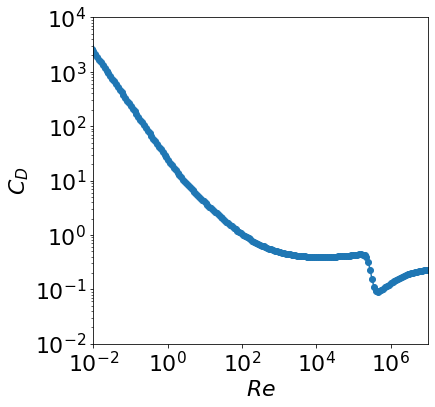

In [56]:
# Plot results from the forward solver:
plt.figure(figsize=(6,6))
plt.loglog(Re_vec, CD_vec, '-o')
plt.ylim(1e-2, 1e4)
plt.xlim(1e-2, 1e7)
plt.xlabel('$Re$')
plt.ylabel('$C_D$')